In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def display_pixel_wise_img_diff(img1_dir, img2_dir, threshold=None, verbose=0, channel=0):
  # Load your two images using TensorFlow
  image1 = tf.image.decode_image(tf.io.read_file(img1_dir))
  image2 = tf.image.decode_image(tf.io.read_file(img2_dir))

  # Ensure both images have the same shape and data type
  image1 = tf.cast(image1, tf.float32)
  image2 = tf.cast(image2, tf.float32)

  # Compute pixel-wise absolute differences
  diff = tf.abs(image1 - image2)
  if verbose > 0:  print(f"Difference map shape: {diff.shape}")

  # Define a colormap (e.g., 'jet') and normalize the differences
  cmap = plt.get_cmap('jet')
  norm = plt.Normalize(vmin=0, vmax=tf.reduce_max(diff).numpy())
  norm_diff = norm(diff)
  if verbose > 0:
    print(f"Normalized difference map shape: {norm_diff.shape}")
    print(f"Normalized difference map min, avg, max value: ({np.min(norm_diff)}, {np.mean(norm_diff):.5f}, {np.max(norm_diff)})")

  colored_diff = cmap(norm_diff)
  if verbose > 0:  print(f"Colored difference map shape: {colored_diff.shape}")

  color_diff_plot = colored_diff[:, :, :,channel]

  if threshold != None:
    color_diff_plot[color_diff_plot < threshold] = 0.0

  # Display the color-coded difference map
  plt.imshow(color_diff_plot)
  plt.colorbar()
  plt.axis('off')
  plt.show()

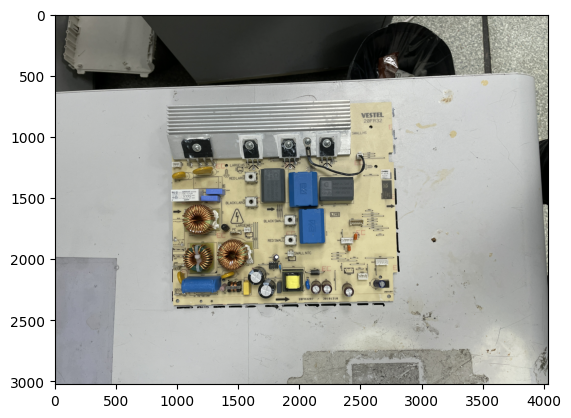

In [2]:
image1 = tf.image.decode_image(tf.io.read_file('image1.jpg'))
image2 = tf.image.decode_image(tf.io.read_file('image2.jpg'))

# Ensure both images have the same shape and data type
image1 = tf.cast(image1, tf.float32) / 255.0
image2 = tf.cast(image2, tf.float32) / 255.0

plt.imshow(image1)

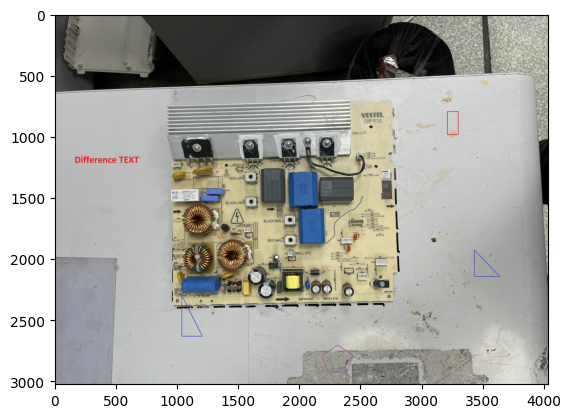

In [3]:
plt.imshow(image2)

### Basic usage

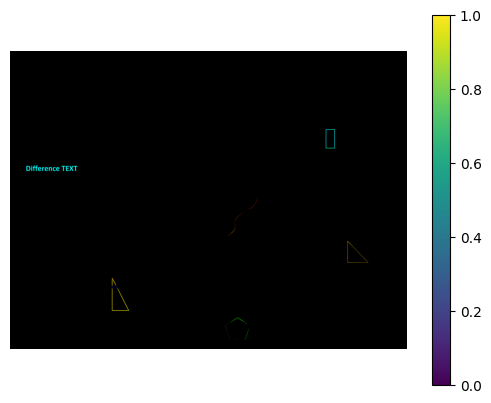

In [4]:
display_pixel_wise_img_diff(img1_dir="image1.jpg", img2_dir="image2.jpg")

### More detailed output and adjusting display channel

Difference map shape: (3024, 4032, 3)
Normalized difference map shape: (3024, 4032, 3)
Normalized difference map min, avg, max value: (0.0, 0.00634, 1.0)
Colored difference map shape: (3024, 4032, 3, 4)


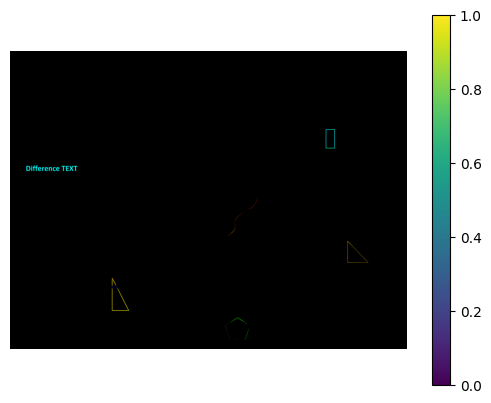

In [5]:
display_pixel_wise_img_diff(img1_dir="image1.jpg", img2_dir="image2.jpg", channel=0, verbose=1)

Difference map shape: (3024, 4032, 3)
Normalized difference map shape: (3024, 4032, 3)
Normalized difference map min, avg, max value: (0.0, 0.00634, 1.0)
Colored difference map shape: (3024, 4032, 3, 4)


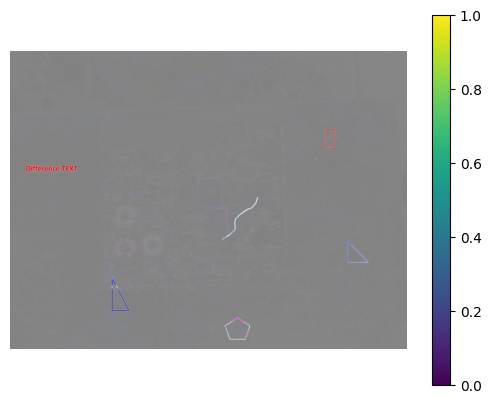

In [6]:
display_pixel_wise_img_diff(img1_dir="image1.jpg", img2_dir="image2.jpg", channel=2, verbose=1)

### More detailed output and setting a threshold for pixel differences

Difference map shape: (3024, 4032, 3)
Normalized difference map shape: (3024, 4032, 3)
Normalized difference map min, avg, max value: (0.0, 0.00634, 1.0)
Colored difference map shape: (3024, 4032, 3, 4)


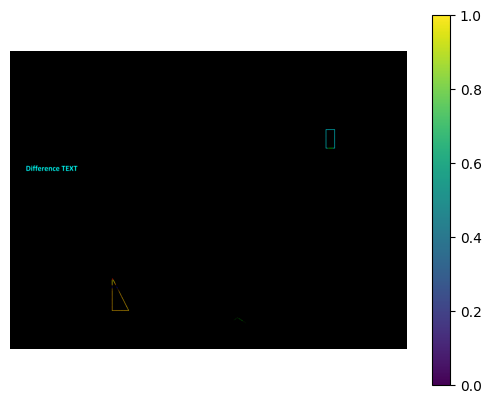

In [7]:
display_pixel_wise_img_diff(img1_dir="image1.jpg", img2_dir="image2.jpg", threshold=0.8, channel=0, verbose=1)

The problem reason is that the 'jet' colormap is not suitable for 3-channel images because it's designed for single-channel (grayscale) data. We can use colormaps like "viridis," "plasma," "inferno," or any other colormap that works well with RGB images.